In [2]:
import pandas as pd

df = pd.read_csv('/Users/aman/Desktop/NASSCOM/TheScripter-s/Preprocessing/AQI/AQI.csv')

In [3]:
# Using the data till DEC 2022 for training and evaluation 

df = df[df['Date']<= '2022-12-31']

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df

,Date,Location,AQI,CO,NO,NO2,O3,SO2,PM2.5,PM10,NH3
0,2020-01-12,"Adilabad, Telangana, India",80,456.175417,0.458333,11.532500,73.984583,14.119167,64.316667,71.244583,7.498333
1,2020-01-12,"Karimnagar, Telangana, India",127,720.283333,1.470000,17.677500,48.816667,7.001667,101.994167,115.704583,14.710833
2,2020-01-12,"Khammam, Telangana, India",94,463.965000,0.108750,6.395833,56.237083,3.274583,75.047500,81.250833,3.192083
3,2020-01-12,"Nizamabad, Telangana, India",93,584.543333,0.411250,9.455417,59.755000,10.259167,74.220000,87.468750,15.049583
4,2020-01-12,"Warangal, Telangana, India",111,641.704167,0.205417,15.177917,52.822500,6.458333,88.811250,98.957917,5.284583
...,...,...,...,...,...,...,...,...,...,...,...
3690,2022-12-30,"Adilabad, Telangana, India",85,537.116250,0.551250,24.267500,51.432083,19.873750,68.129583,76.675000,8.165000
3691,2022-12-30,"Karimnagar, Telangana, India",108,779.669167,1.850000,27.073750,54.335000,14.355833,86.390000,99.132917,12.925833
3692,2022-12-30,"Khammam, Telangana, India",66,375.231667,0.342083,3.838333,48.545833,2.935000,52.775417,58.132917,3.614583
3693,2022-12-30,"Nizamabad, Telangana, India",107,600.952917,0.304167,8.980833,54.635417,12.270000,85.993333,98.587083,12.157083


In [31]:
# For predicting the data, we need to assign the dataframe for the predicted dates which is then concatenated with the dataframe then further divided into train and test data

# start_date='2023-02-20'
# end_date= '2023-03-02'

# locations = ['Adilabad, Telangana, India', 'Karimnagar, Telangana, India',
#      'Khammam, Telangana, India', 'Nizamabad, Telangana, India',
#    'Warangal, Telangana, India']

# dfs = []
# for location in locations:
    
#     temp = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D'),'Location': location,'AQI':0, 'CO':0, 'NO':0, 'NO2':0, 'O3':0, 'SO2':0, 'PM2.5':0,
#        'PM10':0, 'NH3':0})
#     dfs.append(temp)

# combined_df = pd.concat(dfs, ignore_index=True)

# df = pd.concat([df, combined_df])
# df['Date'] = pd.to_datetime(df['Date']).dt.date

In [46]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Function to Fit SARIMAX Model and Forecast
def fit_and_forecast(variable, train_data, test_data):
    # Creating SARIMAX Model
    model = SARIMAX(train_data[variable], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()

    # Predicting Variable
    start_date = test_data.index[0]
    end_date = test_data.index[-1]
    predictions = results.predict(start=start_date, end=end_date, dynamic=False)

    # Evaluating Model Performance
    mse = mean_squared_error(test_data[variable], predictions)
    rmse = np.sqrt(mse)
    print("Root Mean Squared Error for {}: {:.2f}".format(variable, rmse))
    
    mape = mean_absolute_percentage_error(test_data[variable], predictions)
    print("Mean Absolute Percentage Error for {}: {:.2f}".format(variable, mape))
    
    
    return predictions


# Adilabad

/var/folders/69/7vt__1z91mb3zslygkxndqpw0000gn/T/ipykernel_93423/1986795027.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



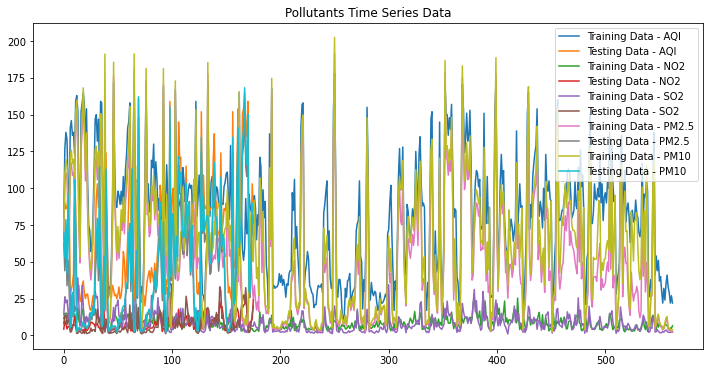

/Users/aman/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/aman/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.98559D+00    |proj g|=  8.81088D-02

At iterate    5    f=  4.92366D+00    |proj g|=  3.49945D-02

At iterate   10    f=  4.78002D+00    |proj g|=  1.01949D-01

At iterate   15    f=  4.76325D+00    |proj g|=  1.72234D-03

At iterate   20    f=  4.75124D+00    |proj g|=  8.28502D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     29      1     0     0   4.511D-05   4.751D+00
  F =   4.7510148408089687     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.67027D+00    |proj g|=  1.60999D-02

At iterate   10    f=  2.66070D+00    |proj g|=  1.34756D-03

At iterate   15    f=  2.65959D+00    |proj g|=  3.76070D-03

At iterate   20    f=  2.65940D+00    |proj g|=  1.04315D-03

At iterate   25    f=  2.65938D+00    |proj g|=  1.72855D-04

At iterate   30    f=  2.65938D+00    |proj g|=  2.29644D-05

At iterate   35    f=  2.65938D+00    |proj g|=  1.30346D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     44      1     0     0   5.853D-05   2.659D+00
  F =   2.6593781083945007     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.04511D+00    |proj g|=  8.42552D-02

At iterate   10    f=  3.03617D+00    |proj g|=  5.32945D-03

At iterate   15    f=  3.03536D+00    |proj g|=  3.36082D-04

At iterate   20    f=  3.03526D+00    |proj g|=  3.57019D-03

At iterate   25    f=  3.03519D+00    |proj g|=  5.32145D-04

At iterate   30    f=  3.03519D+00    |proj g|=  1.97571D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     34      1     0     0   1.976D-06   3.035D+00
  F =   3.0351929463239760     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for SO2: 11.07
Mean Absolut

 This problem is unconstrained.



At iterate    5    f=  4.94455D+00    |proj g|=  2.11044D-02

At iterate   10    f=  4.82914D+00    |proj g|=  5.47182D-02

At iterate   15    f=  4.81536D+00    |proj g|=  1.60602D-02

At iterate   20    f=  4.79970D+00    |proj g|=  7.08070D-03

At iterate   25    f=  4.79960D+00    |proj g|=  3.10081D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     34      1     0     0   3.101D-06   4.800D+00
  F =   4.7996001488616047     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for PM2.5: 63.12
Mean Absolute Percentage Error for PM2.5: 5.90
RUNNING THE L-BFGS-B CODE

 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.08532D+00    |proj g|=  6.58454D-02

At iterate    5    f=  5.03546D+00    |proj g|=  1.64589D-02

At iterate   10    f=  4.90031D+00    |proj g|=  3.60208D-02

At iterate   15    f=  4.89846D+00    |proj g|=  1.02021D-02

At iterate   20    f=  4.89011D+00    |proj g|=  1.75499D-02

At iterate   25    f=  4.88971D+00    |proj g|=  6.54463D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     30      1     0     0   6.545D-06   4.890D+00
  F =

In [49]:
# Assigining new dataframe as per location

df_adilabad = df[df['Location'] == 'Adilabad, Telangana, India']

df_adilabad['Date'] = pd.to_datetime(df_adilabad['Date'])
df_adilabad.set_index('Date', inplace=True)

# Splitting Data into Training and Testing

train_data = df_adilabad['2020-01-01':'2022-06-30'].reset_index(drop=True)
test_data = df_adilabad['2022-07-01':'2022-12-30'].reset_index(drop=True)

# Visualizing Data

plt.figure(figsize=(12,6))
plt.plot(train_data['AQI'], label='Training Data - AQI')
plt.plot(test_data['AQI'], label='Testing Data - AQI')
plt.plot(train_data['NO2'], label='Training Data - NO2')
plt.plot(test_data['NO2'], label='Testing Data - NO2')
plt.plot(train_data['SO2'], label='Training Data - SO2')
plt.plot(test_data['SO2'], label='Testing Data - SO2')
plt.plot(train_data['PM2.5'], label='Training Data - PM2.5')
plt.plot(test_data['PM2.5'], label='Testing Data - PM2.5')
plt.plot(train_data['PM10'], label='Training Data - PM10')
plt.plot(test_data['PM10'], label='Testing Data - PM10')
plt.title('Pollutants Time Series Data')
plt.legend()
plt.show()

# Making Predictions

aqi_predictions = fit_and_forecast('AQI', train_data, test_data)
no2_predictions = fit_and_forecast('NO2', train_data, test_data)
so2_predictions = fit_and_forecast('SO2', train_data, test_data)
pm25_predictions = fit_and_forecast('PM2.5', train_data, test_data)
pm10_predictions = fit_and_forecast('PM10', train_data, test_data)

# Visualizing Forecasted and Test Data

fig = px.line(test_data, x=test_data.index, y=['AQI', 'NO2', 'SO2', 'PM10','PM2.5'])
fig.add_scatter(x=test_data.index, y=aqi_predictions, mode='lines', name='Forecasted - AQI')
fig.add_scatter(x=test_data.index, y=no2_predictions, mode='lines', name='Forecasted - NO2')
fig.add_scatter(x=test_data.index, y=so2_predictions, mode='lines', name='Forecasted - SO2')
fig.add_scatter(x=test_data.index, y=pm25_predictions, mode='lines', name='Forecasted - PM2.5')
fig.add_scatter(x=test_data.index, y=pm10_predictions, mode='lines', name='Forecasted - PM10')
fig.update_layout(title='Pollutant Variable Forecasts', xaxis_title='Date', yaxis_title='Concentration')
fig.show()

# start_date='2022-07-01'
# end_date= '2022-12-30'
# predictions_df_adilabad = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D'),'Location': 'Adilabad, Telangana, India', 
#                                          'AQI': aqi_predictions,'NO2':no2_predictions,'SO2':so2_predictions,'PM2.5':pm25_predictions,'PM10':pm10_predictions})
# predictions_df_adilabad.set_index('Date', inplace=True)


In [50]:
# predictions_df_adilabad = predictions_df_adilabad.reset_index()
# predictions_df_adilabad

In [24]:
# SARIMAX takes arguments order=(p,d,q) & seasonal_order=(P,D,Q,s), so for this reason 
# We have initialized parameters to grid search over the best parameters for SARIMAX.

import itertools

p=d=q=range(0,2)

pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [28]:
aic_calculation = []

In [29]:
# This for loop will iterate over all combinations of initialized parameters, 
# fit SARIMAX model with all combinations and parameters yeilding lowest AIC will be selected

for pdq_params in pdq:
    for seasonal_params in seasonal_pdq:
        try:
            model=SARIMAX(train_data['AQI'],
                          order=pdq_params,
                          seasonal_order=seasonal_params
                         )
            result=model.fit()
            AIC = ("SARIMAX({}x{}12)-AIC:{}".format(pdq_params,
                                                   seasonal_params,
                                                   result.aic
                                                  ))
            aic_calculation.append(AIC)
            print("SARIMAX({}x{}12)-AIC:{}".format(pdq_params,
                                                   seasonal_params,
                                                   result.aic
                                                  ))
        except:
            continue

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92583D+00    |proj g|=  1.24345D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.243D-09   5.926D+00
  F =   5.9258279661025242     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((0, 0, 0)x(0, 0, 0, 12)12)-AIC:6674.482289831442
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variab

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.01801D+00    |proj g|=  1.28757D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     14      1     0     0   1.106D-06   5.017D+00
  F =   5.0171452000692014     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((0, 0, 0)x(0, 1, 1, 12)12)-AIC:5653.305495277921
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.33811D+00    |proj g|=  1.22104D-02

At iterate    5    f=  5.33749D+00    |proj g|=  1.43719D-03

At iterate  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.18145D+00    |proj g|=  4.84868D-02

At iterate   10    f=  5.14749D+00    |proj g|=  1.74081D-02

At iterate   15    f=  5.14274D+00    |proj g|=  4.61635D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   3.467D-06   5.143D+00
  F =   5.1427356797075339     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((0, 0, 0)x(1, 0, 1, 12)12)-AIC:5796.720375350683
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate  

 This problem is unconstrained.
 This problem is unconstrained.


SARIMAX((0, 0, 0)x(1, 1, 0, 12)12)-AIC:5785.155220995264
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.08925D+00    |proj g|=  1.27470D-01

At iterate    5    f=  5.02624D+00    |proj g|=  8.08642D-03

At iterate   10    f=  5.02003D+00    |proj g|=  9.90393D-03

At iterate   15    f=  5.01713D+00    |proj g|=  5.91212D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     21      1     0     0   1.975D-06   5.017D+00
  F =   5.0171264187578206     

CONVERGENCE:

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.48546D+00    |proj g|=  1.89718D-01

At iterate   15    f=  5.33689D+00    |proj g|=  1.60490D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     25      1     0     0   2.329D-06   5.337D+00
  F =   5.3366657709767500     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((0, 0, 1)x(0, 0, 1, 12)12)-AIC:6015.08565811982
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.12577D+00    |proj g|=  1.52907D-01

At iterate   

 This problem is unconstrained.



At iterate   10    f=  5.10926D+00    |proj g|=  2.17451D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     14      1     0     0   1.206D-06   5.109D+00
  F =   5.1092645111045929     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((0, 0, 1)x(0, 1, 0, 12)12)-AIC:5757.031839503772
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.93598D+00    |proj g|=  7.83726D-02

At iterate    5    f=  4.90291D+00    |proj g|=  9.37215D-03


 This problem is unconstrained.



At iterate   10    f=  4.84357D+00    |proj g|=  1.02949D-04

At iterate   15    f=  4.84269D+00    |proj g|=  3.25177D-02

At iterate   20    f=  4.84137D+00    |proj g|=  1.96140D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     43      1     0     0   6.326D-06   4.841D+00
  F =   4.8413159764417077     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((0, 0, 1)x(0, 1, 1, 12)12)-AIC:5457.3217894733625
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.16276D+00    |proj g|=  3.21668D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     23      1     0     0   2.025D-06   5.163D+00
  F =   5.1627617341270717     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((0, 0, 1)x(1, 0, 0, 12)12)-AIC:5819.269712627083
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54895D+00    |proj g|=  1.07102D-01

At iterate    5    f=  5.46219D+00    |proj g|=  9.65284D-03

At iterate  

 This problem is unconstrained.



At iterate   10    f=  4.97807D+00    |proj g|=  1.67390D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     16      1     0     0   8.218D-07   4.978D+00
  F =   4.9780655012445791     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((0, 0, 1)x(1, 1, 0, 12)12)-AIC:5611.3017544013965
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96951D+00    |proj g|=  1.10084D-01


 This problem is unconstrained.



At iterate    5    f=  4.90865D+00    |proj g|=  1.48614D-02

At iterate   10    f=  4.84239D+00    |proj g|=  1.86431D-02

At iterate   15    f=  4.84216D+00    |proj g|=  1.46096D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     19      1     0     0   1.461D-05   4.842D+00
  F =   4.8421612426524376     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX((0, 0, 1)x(1, 1, 1, 12)12)-AIC:5460.2735592266445
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.91597D+00    |proj g|=  4.91980D-02

At iterate    5    f=  4.85519D+00    |proj g|=  1.10399D-03


 This problem is unconstrained.



At iterate   10    f=  4.85474D+00    |proj g|=  3.03120D-04

At iterate   15    f=  4.85457D+00    |proj g|=  2.88958D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     18      1     0     0   4.280D-06   4.855D+00
  F =   4.8545646714359751     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((0, 1, 0)x(0, 1, 1, 12)12)-AIC:5470.239820036908
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.91354D+00    |proj g|=  5.81326D-04

At iterate  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.91353D+00    |proj g|=  2.63327D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     12      1     0     0   2.633D-06   4.914D+00
  F =   4.9135286150084143     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((0, 1, 0)x(1, 0, 0, 12)12)-AIC:5536.633220499474
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.91342D+00    |proj g|=  4.09587D-03

At iterate    5    f=  4.91192D+00    |proj g|=  3.27598D-03

At iterate  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.04547D+00    |proj g|=  5.29984D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     12      1     0     0   4.502D-06   5.045D+00
  F =   5.0454730434234545     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((0, 1, 0)x(1, 1, 0, 12)12)-AIC:5685.20264689481
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.95123D+00    |proj g|=  1.24677D-01

At iterate    5    f=  4.87663D+00    |proj g|=  6.49576D-03

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.17607D+00    |proj g|=  2.03571D-02

At iterate    5    f=  5.17552D+00    |proj g|=  1.39112D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     11      1     0     0   7.697D-06   5.176D+00
  F =   5.1755207911696539     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((0, 1, 1)x(0, 1, 0, 12)12)-AIC:5831.636410857031
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16


 This problem is unconstrained.



At iterate    5    f=  4.86002D+00    |proj g|=  6.50665D-03

At iterate   10    f=  4.84063D+00    |proj g|=  4.57261D-05

At iterate   15    f=  4.84063D+00    |proj g|=  5.49254D-04

At iterate   20    f=  4.84061D+00    |proj g|=  2.38414D-05

At iterate   25    f=  4.84060D+00    |proj g|=  3.64659D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     32      1     0     0   2.621D-06   4.841D+00
  F =   4.8406014546767038     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((0, 1, 1)x(0, 1, 1, 12)12)-AIC:5456.517237965969
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.90019D+00    |proj g|=  2.55381D-02

At iterate   10    f=  4.89934D+00    |proj g|=  1.03946D-04

At iterate   15    f=  4.89933D+00    |proj g|=  6.56710D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     19      1     0     0   6.567D-06   4.899D+00
  F =   4.8993343369859881     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((0, 1, 1)x(1, 0, 1, 12)12)-AIC:5524.650463446223
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.98674D+00    |proj g|=  8.23605D-02

At iterate    5    f=  4.93077D+00    |proj g|=  1.20629D-02


 This problem is unconstrained.



At iterate   10    f=  4.83844D+00    |proj g|=  4.00666D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     19      1     0     0   2.631D-05   4.838D+00
  F =   4.8383329879634838     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX((0, 1, 1)x(1, 1, 1, 12)12)-AIC:5455.962944446883
SARIMAX((1, 0, 0)x(0, 0, 0, 12)12)-AIC:5531.725930939341RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10


At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.90917D+00    |proj g|=  1.28775D-04

           * * *


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     12      1     0     0   1.545D-07   5.077D+00
  F =   5.0771714482704748     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((1, 0, 0)x(0, 1, 0, 12)12)-AIC:5720.895050752555
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.88779D+00    |proj g|=  7.16142D-02

At iterate    5    f=  4.84614D+00    |proj g|=  1.74508D-02


 This problem is unconstrained.



At iterate   10    f=  4.76995D+00    |proj g|=  9.30223D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     20      1     0     0   2.295D-05   4.770D+00
  F =   4.7695520899223007     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX((1, 0, 0)x(0, 1, 1, 12)12)-AIC:5376.515653252511
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.28694D+00    |proj g|=  1.69947D-01



 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  4.90824D+00    |proj g|=  1.32914D-03

At iterate   10    f=  4.90820D+00    |proj g|=  1.62106D-04

SARIMAX((1, 0, 0)x(1, 0, 0, 12)12)-AIC:5532.627346761386           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     17      1     0     0   2.396D-06   4.908D+00
  F =   4.9081948017419066     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.91109D+00    |proj g|=  1.90353D-02

At iterate   

 This problem is unconstrained.


At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.95754D+00    |proj g|=  2.01328D-02

At iterate    5    f=  4.95463D+00    |proj g|=  3.10053D-02

At iterate   10    f=  4.93833D+00    |proj g|=  1.85480D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     14      1     0     0   7.441D-06   4.938D+00
  F =   4.9383218040981012     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((1, 0, 0)x(1, 1, 0, 12)12)-AIC:5566.550351414462
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0        

 This problem is unconstrained.



At iterate   10    f=  4.76918D+00    |proj g|=  9.83644D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   6.948D-06   4.769D+00
  F =   4.7691799661952059     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((1, 0, 0)x(1, 1, 1, 12)12)-AIC:5378.096641935802
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.90289D+00    |proj g|=  2.01030D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.90245D+00    |proj g|=  4.81313D-03

At iterate   10    f=  4.90239D+00    |proj g|=  5.14786D-05

At iterate   15    f=  4.90239D+00    |proj g|=  3.69536D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     17      1     0     0   3.695D-06   4.902D+00
  F =   4.9023874881921063     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((1, 0, 1)x(0, 0, 0, 12)12)-AIC:5526.088311704311
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.84943D+00    |proj g|=  1.07180D-02

At iterate   10    f=  4.76868D+00    |proj g|=  2.58387D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   2.877D-05   4.768D+00
  F =   4.7682674456211371     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX((1, 0, 1)x(0, 1, 1, 12)12)-AIC:5377.0691437694
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.28092D+00    |proj g|=  1.69974D-01

At iterate    

 This problem is unconstrained.



At iterate   10    f=  4.90139D+00    |proj g|=  4.31689D-03

At iterate   15    f=  4.90133D+00    |proj g|=  1.00715D-03

At iterate   20    f=  4.90131D+00    |proj g|=  1.58272D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     26      1     0     0   3.840D-07   4.901D+00
  F =   4.9013066660266658     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((1, 0, 1)x(1, 0, 0, 12)12)-AIC:5526.871305946026
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate  

 This problem is unconstrained.



At iterate    5    f=  4.90201D+00    |proj g|=  1.04202D-03

At iterate   10    f=  4.90022D+00    |proj g|=  8.10323D-03

At iterate   15    f=  4.88033D+00    |proj g|=  5.68980D-03

At iterate   20    f=  4.87495D+00    |proj g|=  9.07253D-03

At iterate   25    f=  4.87223D+00    |proj g|=  7.27125D-03

At iterate   30    f=  4.87051D+00    |proj g|=  1.33037D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     58      1     0     0   5.246D-03   4.870D+00
  F =   4.8704900886438507     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMAX((1, 0, 1)x(1, 0, 1, 12)12)-AIC:5494.171839812976
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.95348D+00    |proj g|=  2.10184D-02

At iterate    5    f=  4.95193D+00    |proj g|=  1.02473D-02

At iterate   10    f=  4.93763D+00    |proj g|=  6.65867D-02

At iterate   15    f=  4.93372D+00    |proj g|=  4.07807D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   4.078D-06   4.934D+00
  F =   4.9337221037037216     

CONVERGENCE:

 This problem is unconstrained.



At iterate    5    f=  4.85270D+00    |proj g|=  1.07797D-02

At iterate   10    f=  4.76829D+00    |proj g|=  1.78445D-02

At iterate   15    f=  4.76796D+00    |proj g|=  5.88720D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   5.887D-06   4.768D+00
  F =   4.7679618838956630     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((1, 0, 1)x(1, 1, 1, 12)12)-AIC:5378.725081266516
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.90568D+00    |proj g|=  7.29649D-04

At iterate   10    f=  4.90568D+00    |proj g|=  2.43920D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   2.439D-06   4.906D+00
  F =   4.9056811454245475     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((1, 1, 0)x(0, 0, 1, 12)12)-AIC:5529.79696974804
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.18138D+00    |proj g|=  8.81469D-05

           * 

 This problem is unconstrained.



At iterate    5    f=  4.89703D+00    |proj g|=  5.02487D-02

At iterate   10    f=  4.84594D+00    |proj g|=  7.85736D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   7.857D-06   4.846D+00
  F =   4.8459369758046051     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((1, 1, 0)x(0, 1, 1, 12)12)-AIC:5462.525034755985
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.90605D+00    |proj g|=  6.51214D-03

At iterate  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.90441D+00    |proj g|=  1.32161D-04

At iterate   15    f=  4.90440D+00    |proj g|=  9.21436D-04

At iterate   20    f=  4.90440D+00    |proj g|=  2.77680D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     22      1     0     0   2.777D-05   4.904D+00
  F =   4.9044014439511363     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX((1, 1, 0)x(1, 0, 1, 12)12)-AIC:5530.356025888979
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate  

 This problem is unconstrained.



At iterate   10    f=  5.03939D+00    |proj g|=  2.41178D-02
SARIMAX((1, 1, 0)x(1, 1, 0, 12)12)-AIC:5679.398884497465
           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   3.451D-07   5.039D+00
  F =   5.0385425261966823     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99425D+00    |proj g|=  7.97466D-02


 This problem is unconstrained.



At iterate    5    f=  4.94412D+00    |proj g|=  1.03609D-02

At iterate   10    f=  4.84354D+00    |proj g|=  6.62187D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     19      1     0     0   7.302D-06   4.844D+00
  F =   4.8435420503844098     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((1, 1, 0)x(1, 1, 1, 12)12)-AIC:5461.828348732845
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.91864D+00    |proj g|=  1.37698D-01

At iterate  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.81407D+00    |proj g|=  3.27286D-03

At iterate   15    f=  4.81123D+00    |proj g|=  6.30775D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     21      1     0     0   6.308D-06   4.811D+00
  F =   4.8112284579153677     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((1, 1, 1)x(0, 0, 0, 12)12)-AIC:5423.4432436127045
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.91521D+00    |proj g|=  1.33093D-01

At iterate 

 This problem is unconstrained.



At iterate   20    f=  5.07308D+00    |proj g|=  8.28820D-04

At iterate   25    f=  5.07290D+00    |proj g|=  4.55148D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     34      1     0     0   2.368D-06   5.073D+00
  F =   5.0728746945212277     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((1, 1, 1)x(0, 1, 0, 12)12)-AIC:5718.056906030903
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.95563D+00    |proj g|=  7.68454D-02


 This problem is unconstrained.



At iterate    5    f=  4.89976D+00    |proj g|=  4.82206D-02

At iterate   10    f=  4.75768D+00    |proj g|=  8.74115D-03

At iterate   15    f=  4.75506D+00    |proj g|=  2.14879D-02

At iterate   20    f=  4.75310D+00    |proj g|=  4.22800D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     24      1     0     0   4.228D-06   4.753D+00
  F =   4.7530993973631217     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((1, 1, 1)x(0, 1, 1, 12)12)-AIC:5359.989921430875
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At 

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     25      1     0     0   2.394D-06   4.809D+00
  F =   4.8091161948950099     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((1, 1, 1)x(1, 0, 0, 12)12)-AIC:5423.064835451781
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.91546D+00    |proj g|=  1.33026D-01

At iterate    5    f=  4.89384D+00    |proj g|=  1.96028D-01

At iterate   10    f=  4.81469D+00    |proj g|=  2.71742D-02


 This problem is unconstrained.



At iterate   15    f=  4.81044D+00    |proj g|=  5.41461D-03

At iterate   20    f=  4.80716D+00    |proj g|=  1.91620D-03

At iterate   25    f=  4.80714D+00    |proj g|=  2.51648D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     33      1     0     0   1.186D-06   4.807D+00
  F =   4.8071325930042157     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX((1, 1, 1)x(1, 0, 1, 12)12)-AIC:5422.831299722747
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate  

 This problem is unconstrained.



At iterate   10    f=  4.99933D+00    |proj g|=  5.76070D-02

At iterate   15    f=  4.95437D+00    |proj g|=  9.80719D-03

At iterate   20    f=  4.93493D+00    |proj g|=  1.36130D-04

At iterate   25    f=  4.93489D+00    |proj g|=  3.40565D-03

At iterate   30    f=  4.93456D+00    |proj g|=  6.04936D-04

At iterate   35    f=  4.93453D+00    |proj g|=  3.06534D-04

At iterate   40    f=  4.93452D+00    |proj g|=  2.12315D-04

At iterate   45    f=  4.93452D+00    |proj g|=  4.53189D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     48     55      1     0     0   2.434D-06   4.935D+00
  F =   4.93452079712

 This problem is unconstrained.



At iterate    5    f=  4.92366D+00    |proj g|=  3.49945D-02

At iterate   10    f=  4.78002D+00    |proj g|=  1.01949D-01

At iterate   15    f=  4.76325D+00    |proj g|=  1.72234D-03

At iterate   20    f=  4.75124D+00    |proj g|=  8.28502D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     29      1     0     0   4.511D-05   4.751D+00
  F =   4.7510148408089687     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX((1, 1, 1)x(1, 1, 1, 12)12)-AIC:5359.642710750899


# Nizamabad

/var/folders/69/7vt__1z91mb3zslygkxndqpw0000gn/T/ipykernel_93423/1942437213.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



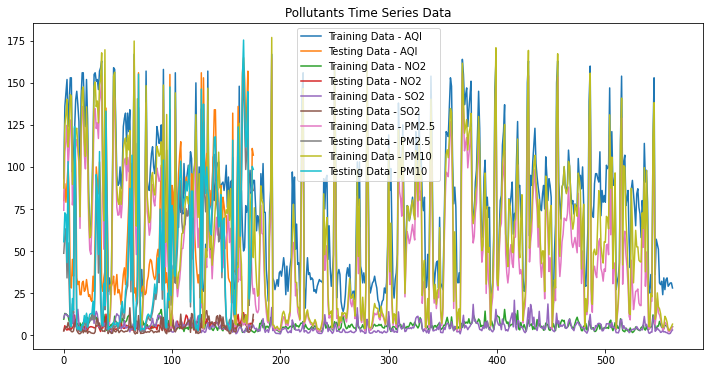

/Users/aman/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/aman/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.92752D+00    |proj g|=  8.70853D-02

At iterate    5    f=  4.86728D+00    |proj g|=  2.99852D-02

At iterate   10    f=  4.70646D+00    |proj g|=  9.41954D-02

At iterate   15    f=  4.69858D+00    |proj g|=  1.52973D-02

At iterate   20    f=  4.69415D+00    |proj g|=  2.28743D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     27      1     0     0   9.171D-06   4.694D+00
  F =   4.6941497542344086     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29741D+00    |proj g|=  1.29938D-01

At iterate    5    f=  2.14907D+00    |proj g|=  1.10257D-01

At iterate   10    f=  2.13540D+00    |proj g|=  2.29954D-03

At iterate   15    f=  2.13485D+00    |proj g|=  2.52801D-03

At iterate   20    f=  2.13482D+00    |proj g|=  3.32179D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   3.322D-06   2.135D+00
  F =   2.1348187398309730     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.48811D+00    |proj g|=  3.72790D-02

At iterate   10    f=  2.46485D+00    |proj g|=  2.66657D-03

At iterate   15    f=  2.46479D+00    |proj g|=  2.85566D-03

At iterate   20    f=  2.46464D+00    |proj g|=  8.11806D-04

At iterate   25    f=  2.46463D+00    |proj g|=  1.35108D-04

At iterate   30    f=  2.46463D+00    |proj g|=  2.23406D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     33      1     0     0   2.234D-05   2.465D+00
  F =   2.4646315128534431     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Root Mean Squared Error for SO2: 4.56
Mean Absolute

 This problem is unconstrained.



At iterate    5    f=  4.71382D+00    |proj g|=  6.84919D-02

At iterate   10    f=  4.70041D+00    |proj g|=  1.72007D-02

At iterate   15    f=  4.68912D+00    |proj g|=  1.24121D-03

At iterate   20    f=  4.68912D+00    |proj g|=  1.85381D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     28      1     0     0   1.854D-06   4.689D+00
  F =   4.6891152579475301     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for PM2.5: 63.71
Mean Absolute Percentage Error for PM2.5: 6.34
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        

 This problem is unconstrained.



At iterate    5    f=  4.96111D+00    |proj g|=  1.13093D-02

At iterate   10    f=  4.83244D+00    |proj g|=  1.69980D-02

At iterate   15    f=  4.83153D+00    |proj g|=  1.67283D-03

At iterate   20    f=  4.81111D+00    |proj g|=  4.25322D-02

At iterate   25    f=  4.80729D+00    |proj g|=  2.22938D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     46      1     0     0   7.063D-06   4.807D+00
  F =   4.8072898589277990     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for PM10: 69.16
Mean Absolute Percentage Error for PM10: 5.72


In [53]:
# Assigining new dataframe as per location

df_nizamabad = df[df['Location'] == 'Nizamabad, Telangana, India']

df_nizamabad['Date'] = pd.to_datetime(df_nizamabad['Date'])
df_nizamabad.set_index('Date', inplace=True)

# Splitting Data into Training and Testing

train_data = df_nizamabad['2020-01-01':'2022-06-30'].reset_index(drop=True)
test_data = df_nizamabad['2022-07-01':'2022-12-31'].reset_index(drop=True)

# Visualizing Data

plt.figure(figsize=(12,6))
plt.plot(train_data['AQI'], label='Training Data - AQI')
plt.plot(test_data['AQI'], label='Testing Data - AQI')
plt.plot(train_data['NO2'], label='Training Data - NO2')
plt.plot(test_data['NO2'], label='Testing Data - NO2')
plt.plot(train_data['SO2'], label='Training Data - SO2')
plt.plot(test_data['SO2'], label='Testing Data - SO2')
plt.plot(train_data['PM2.5'], label='Training Data - PM2.5')
plt.plot(test_data['PM2.5'], label='Testing Data - PM2.5')
plt.plot(train_data['PM10'], label='Training Data - PM10')
plt.plot(test_data['PM10'], label='Testing Data - PM10')
plt.title('Pollutants Time Series Data')
plt.legend()
plt.show()

# Making Predictions

aqi_predictions = fit_and_forecast('AQI', train_data, test_data)
no2_predictions = fit_and_forecast('NO2', train_data, test_data)
so2_predictions = fit_and_forecast('SO2', train_data, test_data)
pm25_predictions = fit_and_forecast('PM2.5', train_data, test_data)
pm10_predictions = fit_and_forecast('PM10', train_data, test_data)

# Visualizing Forecasted and Test Data

fig = px.line(test_data, x=test_data.index, y=['AQI', 'NO2', 'SO2', 'PM10','PM2.5'])
fig.add_scatter(x=test_data.index, y=aqi_predictions, mode='lines', name='Forecasted - AQI')
fig.add_scatter(x=test_data.index, y=no2_predictions, mode='lines', name='Forecasted - NO2')
fig.add_scatter(x=test_data.index, y=so2_predictions, mode='lines', name='Forecasted - SO2')
fig.add_scatter(x=test_data.index, y=pm25_predictions, mode='lines', name='Forecasted - PM2.5')
fig.add_scatter(x=test_data.index, y=pm10_predictions, mode='lines', name='Forecasted - PM10')
fig.update_layout(title='Pollutant Variable Forecasts', xaxis_title='Date', yaxis_title='Concentration')
fig.show()


# start_date='2022-07-01'
# end_date= '2022-12-31'
# predictions_df_nizamabad = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D'),'Location': 'Nizamabad, Telangana, India', 
#                                         'AQI': aqi_predictions,'NO2':no2_predictions,'SO2':so2_predictions,'PM2.5':pm25_predictions,'PM10':pm10_predictions})
# predictions_df_nizamabad.set_index('Date', inplace=True)

In [55]:
# predictions_df_nizamabad = predictions_df_nizamabad.reset_index()
# predictions_df_nizamabad

# Khammam

/var/folders/69/7vt__1z91mb3zslygkxndqpw0000gn/T/ipykernel_93423/2278848323.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



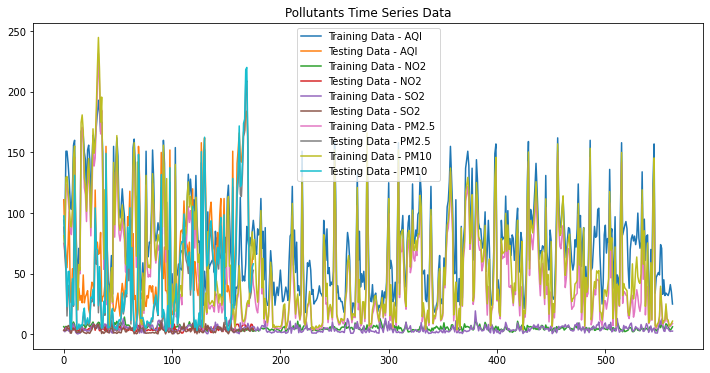

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.91077D+00    |proj g|=  6.93529D-02

At iterate    5    f=  4.86215D+00    |proj g|=  2.57569D-02

At iterate   10    f=  4.75010D+00    |proj g|=  3.43061D-02

At iterate   15    f=  4.74853D+00    |proj g|=  4.53340D-03

At iterate   20    f=  4.72859D+00    |proj g|=  2.13335D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     37      1     0     0   1.731D-05   4.728D+00
  F =   4.7282336685817148     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.15273D+00    |proj g|=  1.55819D-01

At iterate    5    f=  2.00628D+00    |proj g|=  3.81312D-02

At iterate   10    f=  1.98557D+00    |proj g|=  6.69200D-03

At iterate   15    f=  1.98473D+00    |proj g|=  3.44536D-04

At iterate   20    f=  1.98471D+00    |proj g|=  3.29498D-03

At iterate   25    f=  1.98463D+00    |proj g|=  5.33228D-04

At iterate   30    f=  1.98462D+00    |proj g|=  1.78910D-04

At iterate   35    f=  1.98462D+00    |proj g|=  1.78493D-04

At iterate   40    f=  1.98462D+00    |proj g|=  2.53801D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  2.39145D+00    |proj g|=  3.18770D-02

At iterate   10    f=  2.37058D+00    |proj g|=  4.12774D-03

At iterate   15    f=  2.37021D+00    |proj g|=  8.92797D-05

At iterate   20    f=  2.37021D+00    |proj g|=  6.63268D-04

At iterate   25    f=  2.37019D+00    |proj g|=  6.39547D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     32      1     0     0   8.817D-06   2.370D+00
  F =   2.3701917750207202     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for SO2: 3.62
Mean Absolute Percentage Error for SO2: 2.06
RUNNING THE L-BFGS-B CODE

   

 This problem is unconstrained.



At iterate    5    f=  4.86980D+00    |proj g|=  1.81880D-02

At iterate   10    f=  4.75679D+00    |proj g|=  6.21313D-02

At iterate   15    f=  4.74753D+00    |proj g|=  4.69245D-04

At iterate   20    f=  4.74751D+00    |proj g|=  2.60991D-03

At iterate   25    f=  4.73285D+00    |proj g|=  1.02343D-01

At iterate   30    f=  4.72451D+00    |proj g|=  1.31429D-04

At iterate   35    f=  4.72451D+00    |proj g|=  9.09969D-04
  ys=-1.737E-03  -gs= 8.692E-05 BFGS update SKIPPED

At iterate   40    f=  4.72247D+00    |proj g|=  1.90030D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     67      1     1

 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00961D+00    |proj g|=  7.74121D-02

At iterate    5    f=  4.95618D+00    |proj g|=  1.10172D-02

At iterate   10    f=  4.84879D+00    |proj g|=  5.41097D-02

At iterate   15    f=  4.83437D+00    |proj g|=  3.44574D-04

At iterate   20    f=  4.83428D+00    |proj g|=  7.07629D-03
  ys=-9.126E-03  -gs= 1.153E-03 BFGS update SKIPPED

At iterate   25    f=  4.80996D+00    |proj g|=  1.09091D-02

At iterate   30    f=  4.80982D+00    |proj g|=  3.01638D-04

At iterate   35    f=  4.80914D+00    |proj g|=  3.82292D-02
  ys=-5.535E-04  -gs= 1.248E-04 BFGS update SKIPPED

At iterate   40    f=  4.80780D+00    |proj g|=  3.96897D-03

At iterate   45    f=  4.80774D+00    |proj g|=  1.32948D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of ac

In [38]:
# Assigining new dataframe as per location

df_khammam = df[df['Location'] == 'Khammam, Telangana, India']

df_khammam['Date'] = pd.to_datetime(df_khammam['Date'])
df_khammam.set_index('Date', inplace=True)

# Splitting Data into Training and Testing

train_data = df_khammam['2020-01-01':'2022-06-30'].reset_index(drop=True)
test_data = df_khammam['2022-07-01':'2022-12-31'].reset_index(drop=True)

# Visualizing Data

plt.figure(figsize=(12,6))
plt.plot(train_data['AQI'], label='Training Data - AQI')
plt.plot(test_data['AQI'], label='Testing Data - AQI')
plt.plot(train_data['NO2'], label='Training Data - NO2')
plt.plot(test_data['NO2'], label='Testing Data - NO2')
plt.plot(train_data['SO2'], label='Training Data - SO2')
plt.plot(test_data['SO2'], label='Testing Data - SO2')
plt.plot(train_data['PM2.5'], label='Training Data - PM2.5')
plt.plot(test_data['PM2.5'], label='Testing Data - PM2.5')
plt.plot(train_data['PM10'], label='Training Data - PM10')
plt.plot(test_data['PM10'], label='Testing Data - PM10')
plt.title('Pollutants Time Series Data')
plt.legend()
plt.show()

# Making Predictions

aqi_predictions = fit_and_forecast('AQI', train_data, test_data)
no2_predictions = fit_and_forecast('NO2', train_data, test_data)
so2_predictions = fit_and_forecast('SO2', train_data, test_data)
pm25_predictions = fit_and_forecast('PM2.5', train_data, test_data)
pm10_predictions = fit_and_forecast('PM10', train_data, test_data)

# Visualizing Forecasted and Test Data

fig = px.line(test_data, x=test_data.index, y=['AQI', 'NO2', 'SO2', 'PM10','PM2.5'])
fig.add_scatter(x=test_data.index, y=aqi_predictions, mode='lines', name='Forecasted - AQI')
fig.add_scatter(x=test_data.index, y=no2_predictions, mode='lines', name='Forecasted - NO2')
fig.add_scatter(x=test_data.index, y=so2_predictions, mode='lines', name='Forecasted - SO2')
fig.add_scatter(x=test_data.index, y=pm25_predictions, mode='lines', name='Forecasted - PM2.5')
fig.add_scatter(x=test_data.index, y=pm10_predictions, mode='lines', name='Forecasted - PM10')
fig.update_layout(title='Pollutant Variable Forecasts', xaxis_title='Date', yaxis_title='Concentration')
fig.show()

# start_date='2022-07-01'
# end_date= '2022-12-31'
# predictions_df_khammam = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D'),'Location': 'Khammam, Telangana, India', 'AQI': aqi_predictions,'NO2':no2_predictions, 
#                                'SO2':so2_predictions,'PM2.5':pm25_predictions,'PM10':pm10_predictions})
# predictions_df_khammam.set_index('Date', inplace=True)

In [54]:
# predictions_df_khammam = predictions_df_khammam.reset_index()
# predictions_df_khammam

# Karimnagar

/var/folders/69/7vt__1z91mb3zslygkxndqpw0000gn/T/ipykernel_93423/2434854167.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



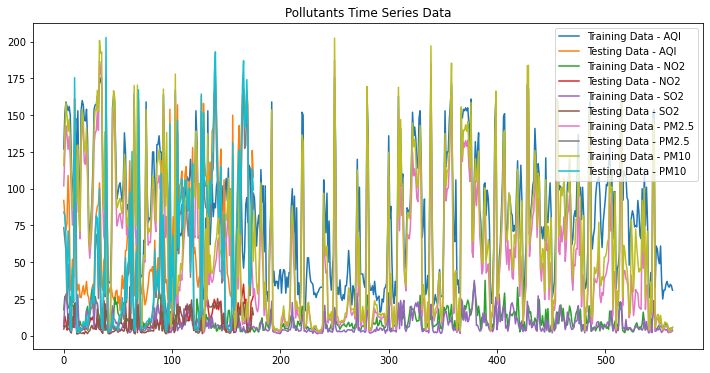

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.95956D+00    |proj g|=  6.29338D-02

At iterate    5    f=  4.91054D+00    |proj g|=  3.96522D-02

At iterate   10    f=  4.78107D+00    |proj g|=  3.81324D-02

At iterate   15    f=  4.77476D+00    |proj g|=  5.71338D-02

At iterate   20    f=  4.77181D+00    |proj g|=  7.98280D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     29      1     0     0   2.780D-06   4.772D+00
  F =   4.7718064623202512     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  3.08417D+00    |proj g|=  2.14209D-02

At iterate   15    f=  3.08352D+00    |proj g|=  7.81014D-04

At iterate   20    f=  3.08344D+00    |proj g|=  4.77589D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   1.901D-04   3.083D+00
  F =   3.0834335475118642     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Root Mean Squared Error for NO2: 9.87
Mean Absolute Percentage Error for NO2: 1.10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly a

 This problem is unconstrained.



At iterate    5    f=  3.10784D+00    |proj g|=  9.31976D-02

At iterate   10    f=  3.09108D+00    |proj g|=  2.31092D-02

At iterate   15    f=  3.08907D+00    |proj g|=  3.81664D-04

At iterate   20    f=  3.08899D+00    |proj g|=  8.76995D-03

At iterate   25    f=  3.08885D+00    |proj g|=  4.83287D-04

At iterate   30    f=  3.08883D+00    |proj g|=  4.43526D-04

At iterate   35    f=  3.08883D+00    |proj g|=  5.08699D-05

At iterate   40    f=  3.08883D+00    |proj g|=  9.30594D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     47      1     0     0   7.986D-06   3.089D+00
  F =   3.08882656267

 This problem is unconstrained.



At iterate    5    f=  4.94496D+00    |proj g|=  5.35400D-02

At iterate   10    f=  4.81101D+00    |proj g|=  2.85669D-02

At iterate   15    f=  4.81005D+00    |proj g|=  3.44077D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   1.739D-06   4.810D+00
  F =   4.8099350002998609     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for PM2.5: 70.66
Mean Absolute Percentage Error for PM2.5: 6.79
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exac

 This problem is unconstrained.



At iterate    5    f=  5.07238D+00    |proj g|=  9.86408D-03

At iterate   10    f=  4.94997D+00    |proj g|=  2.54162D-02

At iterate   15    f=  4.94695D+00    |proj g|=  2.06067D-04

At iterate   20    f=  4.94080D+00    |proj g|=  6.93563D-02

At iterate   25    f=  4.92597D+00    |proj g|=  3.32459D-03

At iterate   30    f=  4.92537D+00    |proj g|=  1.73323D-03

At iterate   35    f=  4.92500D+00    |proj g|=  5.37445D-03

At iterate   40    f=  4.92484D+00    |proj g|=  3.05146D-03

At iterate   45    f=  4.92482D+00    |proj g|=  9.58832D-05


/Users/aman/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  4.92482D+00    |proj g|=  1.42078D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     67      1     0     0   1.421D-04   4.925D+00
  F =   4.9248210997899999     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Root Mean Squared Error for PM10: 76.30
Mean Absolute Percentage Error for PM10: 6.05


In [39]:
# Assigining new dataframe as per location

df_karimnagar = df[df['Location'] == 'Karimnagar, Telangana, India']

df_karimnagar['Date'] = pd.to_datetime(df_karimnagar['Date'])
df_karimnagar.set_index('Date', inplace=True)

# Splitting Data into Training and Testing

train_data = df_karimnagar['2020-01-01':'2022-06-30'].reset_index(drop=True)
test_data = df_karimnagar['2022-07-01':'2022-12-31'].reset_index(drop=True)

# Visualizing Data

plt.figure(figsize=(12,6))
plt.plot(train_data['AQI'], label='Training Data - AQI')
plt.plot(test_data['AQI'], label='Testing Data - AQI')
plt.plot(train_data['NO2'], label='Training Data - NO2')
plt.plot(test_data['NO2'], label='Testing Data - NO2')
plt.plot(train_data['SO2'], label='Training Data - SO2')
plt.plot(test_data['SO2'], label='Testing Data - SO2')
plt.plot(train_data['PM2.5'], label='Training Data - PM2.5')
plt.plot(test_data['PM2.5'], label='Testing Data - PM2.5')
plt.plot(train_data['PM10'], label='Training Data - PM10')
plt.plot(test_data['PM10'], label='Testing Data - PM10')
plt.title('Pollutants Time Series Data')
plt.legend()
plt.show()

# Making Predictions

aqi_predictions = fit_and_forecast('AQI', train_data, test_data)
no2_predictions = fit_and_forecast('NO2', train_data, test_data)
so2_predictions = fit_and_forecast('SO2', train_data, test_data)
pm25_predictions = fit_and_forecast('PM2.5', train_data, test_data)
pm10_predictions = fit_and_forecast('PM10', train_data, test_data)

# Visualizing Forecasted and Test Data

fig = px.line(test_data, x=test_data.index, y=['AQI', 'NO2', 'SO2', 'PM10','PM2.5'])
fig.add_scatter(x=test_data.index, y=aqi_predictions, mode='lines', name='Forecasted - AQI')
fig.add_scatter(x=test_data.index, y=no2_predictions, mode='lines', name='Forecasted - NO2')
fig.add_scatter(x=test_data.index, y=so2_predictions, mode='lines', name='Forecasted - SO2')
fig.add_scatter(x=test_data.index, y=pm25_predictions, mode='lines', name='Forecasted - PM2.5')
fig.add_scatter(x=test_data.index, y=pm10_predictions, mode='lines', name='Forecasted - PM10')
fig.update_layout(title='Pollutant Variable Forecasts', xaxis_title='Date', yaxis_title='Concentration')
fig.show()

# start_date='2022-07-01'
# end_date= '2022-12-31'
# predictions_df_karimnagar = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D'),'Location': 'Karimnagar, Telangana, India', 'AQI': aqi_predictions,'NO2':no2_predictions, 
#                                'SO2':so2_predictions,'PM2.5':pm25_predictions,'PM10':pm10_predictions})
# predictions_df_karimnagar.set_index('Date', inplace=True)

In [56]:
# predictions_df_karimnagar = predictions_df_karimnagar.reset_index()
# predictions_df_karimnagar

# Warangal

/var/folders/69/7vt__1z91mb3zslygkxndqpw0000gn/T/ipykernel_93423/3731079647.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



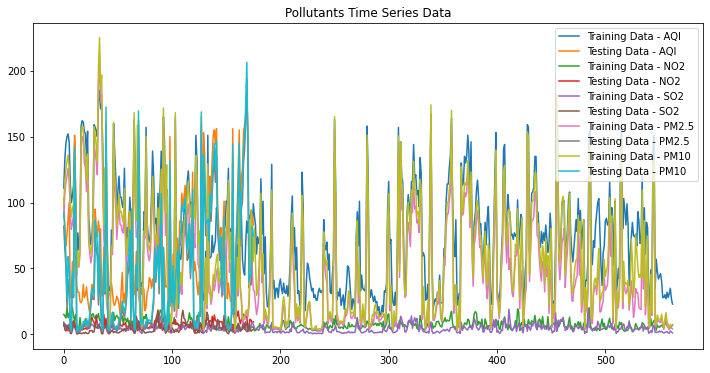

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.90236D+00    |proj g|=  6.89297D-02


 This problem is unconstrained.



At iterate    5    f=  4.85403D+00    |proj g|=  1.19800D-02

At iterate   10    f=  4.73715D+00    |proj g|=  3.62181D-02

At iterate   15    f=  4.73504D+00    |proj g|=  2.18095D-02

At iterate   20    f=  4.72642D+00    |proj g|=  4.62152D-02

At iterate   25    f=  4.72523D+00    |proj g|=  2.35370D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     33      1     0     0   7.251D-06   4.725D+00
  F =   4.7252293605266038     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for AQI: 62.01
Mean Absolute Percentage Error for AQI: 1.25
RUNNING THE L-BFGS-B CODE

  

 This problem is unconstrained.



At iterate    5    f=  2.48887D+00    |proj g|=  3.80361D-02

At iterate   10    f=  2.46930D+00    |proj g|=  1.16707D-03

At iterate   15    f=  2.46929D+00    |proj g|=  3.28273D-04

At iterate   20    f=  2.46928D+00    |proj g|=  5.32832D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   7.769D-06   2.469D+00
  F =   2.4692804945702171     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for NO2: 5.63
Mean Absolute Percentage Error for NO2: 0.84
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5

 This problem is unconstrained.



At iterate    5    f=  2.37005D+00    |proj g|=  2.02711D-02

At iterate   10    f=  2.34984D+00    |proj g|=  4.43134D-03

At iterate   15    f=  2.34962D+00    |proj g|=  2.55284D-03

At iterate   20    f=  2.34901D+00    |proj g|=  1.37487D-03

At iterate   25    f=  2.34895D+00    |proj g|=  3.03208D-04

At iterate   30    f=  2.34894D+00    |proj g|=  3.64557D-04

At iterate   35    f=  2.34894D+00    |proj g|=  2.65814D-04

At iterate   40    f=  2.34894D+00    |proj g|=  6.89946D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     50      1     0     0   1.324D-04   2.349D+00
  F =   2.34893730216

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.91262D+00    |proj g|=  7.13562D-02

At iterate    5    f=  4.86328D+00    |proj g|=  1.20464D-02

At iterate   10    f=  4.74463D+00    |proj g|=  1.17411D-02

At iterate   15    f=  4.74427D+00    |proj g|=  5.75407D-03

At iterate   20    f=  4.73074D+00    |proj g|=  7.17872D-02

At iterate   25    f=  4.72680D+00    |proj g|=  2.75371D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     32      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  4.97138D+00    |proj g|=  1.07092D-02

At iterate   10    f=  4.85671D+00    |proj g|=  4.96629D-02

At iterate   15    f=  4.85485D+00    |proj g|=  6.00011D-04
  ys=-6.059E-03  -gs= 1.111E-03 BFGS update SKIPPED

At iterate   20    f=  4.84071D+00    |proj g|=  6.48879D-02

At iterate   25    f=  4.83475D+00    |proj g|=  2.20963D-03

At iterate   30    f=  4.83474D+00    |proj g|=  3.51620D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     57      1     1     0   1.950D-06   4.835D+00
  F =   4.8347365314162936     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

In [40]:
# Assigining new dataframe as per location

df_warangal = df[df['Location'] == 'Warangal, Telangana, India']

df_warangal['Date'] = pd.to_datetime(df_warangal['Date'])
df_warangal.set_index('Date', inplace=True)

# Splitting Data into Training and Testing

train_data = df_warangal['2020-01-01':'2022-06-30'].reset_index(drop=True)
test_data = df_warangal['2022-07-01':'2022-12-31'].reset_index(drop=True)

# Visualizing Data

plt.figure(figsize=(12,6))
plt.plot(train_data['AQI'], label='Training Data - AQI')
plt.plot(test_data['AQI'], label='Testing Data - AQI')
plt.plot(train_data['NO2'], label='Training Data - NO2')
plt.plot(test_data['NO2'], label='Testing Data - NO2')
plt.plot(train_data['SO2'], label='Training Data - SO2')
plt.plot(test_data['SO2'], label='Testing Data - SO2')
plt.plot(train_data['PM2.5'], label='Training Data - PM2.5')
plt.plot(test_data['PM2.5'], label='Testing Data - PM2.5')
plt.plot(train_data['PM10'], label='Training Data - PM10')
plt.plot(test_data['PM10'], label='Testing Data - PM10')
plt.title('Pollutants Time Series Data')
plt.legend()
plt.show()

# Making Predictions

aqi_predictions = fit_and_forecast('AQI', train_data, test_data)
no2_predictions = fit_and_forecast('NO2', train_data, test_data)
so2_predictions = fit_and_forecast('SO2', train_data, test_data)
pm25_predictions = fit_and_forecast('PM2.5', train_data, test_data)
pm10_predictions = fit_and_forecast('PM10', train_data, test_data)

# Visualizing Forecasted and Test Data

fig = px.line(test_data, x=test_data.index, y=['AQI', 'NO2', 'SO2', 'PM10','PM2.5'])
fig.add_scatter(x=test_data.index, y=aqi_predictions, mode='lines', name='Forecasted - AQI')
fig.add_scatter(x=test_data.index, y=no2_predictions, mode='lines', name='Forecasted - NO2')
fig.add_scatter(x=test_data.index, y=so2_predictions, mode='lines', name='Forecasted - SO2')
fig.add_scatter(x=test_data.index, y=pm25_predictions, mode='lines', name='Forecasted - PM2.5')
fig.add_scatter(x=test_data.index, y=pm10_predictions, mode='lines', name='Forecasted - PM10')
fig.update_layout(title='Pollutant Variable Forecasts', xaxis_title='Date', yaxis_title='Concentration')
fig.show()

# start_date='2023-01-01'
# end_date= '2023-12-31'
# predictions_df_warangal = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D'),'Location': 'Warangal, Telangana, India', 'AQI': aqi_predictions,'NO2':no2_predictions, 
#                                'SO2':so2_predictions,'PM2.5':pm25_predictions,'PM10':pm10_predictions})
# predictions_df_warangal.set_index('Date', inplace=True)

In [57]:
# predictions_df_warangal = predictions_df_warangal.reset_index()
# predictions_df_warangal